# Lesson - Statistics and Probability X: Measures of Variability

In this lesson, we'll focus on the individual values in a distribution, and learn a few statistical techniques that can help us answer practical questions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Setting pandas display options for large data
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100

In [2]:
# Explore AmesHousing1.txt dataset
houses = pd.read_csv('AmesHousing_1.txt', sep = '\t')
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

### Individual Values
We can sample randomly one sale price from the SalePrice column and see what can we say about the sampled value:

In [3]:
print(houses['SalePrice'].sample(1, random_state = 0))

2216    220000
Name: SalePrice, dtype: int64


We can see we got a price of 220,000. Is a house costing 220,000 cheap, expensive, or average-priced? To answer this question, we can start with finding the mean price of a house and then figure out whether 220,000 is below or above the mean:

In [4]:
print(houses['SalePrice'].mean())

180796.0600682594


The sampled house (220,000) is clearly more expensive than the average house (roughly 180,796), but is this price slightly above the average or extremely above the average? The answer depends on the standard deviation of the distribution of sale prices.

To see why this is true, consider below two normally-distributed samples of sale prices. Both samples have the same mean Bbut the sample standard deviations are different.

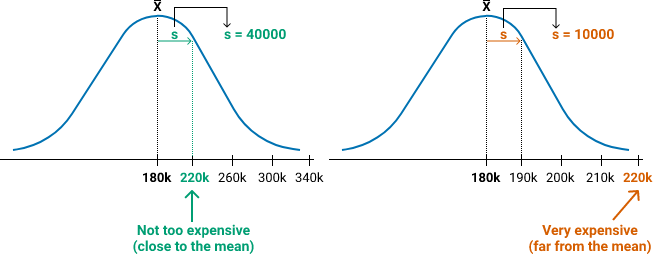

For the sample with a greater standard deviation (s=40000), we can see that $220,000 is fairly close to the mean, indicating that houses at that price are common and thus not very expensive (relative to the other houses on the market).

For the other sample (s=10000), we see $220,000 on the far right of the distribution, indicating that houses at that price are uncommon and thus very expensive (relative to the other houses on the market).

**Exercise**

Generate a kernel density plot for the `SalePrice` variable to find out how far off 220,000 is from the mean.

- Generate the plot using `Series.plot.kde()`.
- The limits of the x-axis should be the minimum and the maximum value of the `SalePrice` variable. To set the limits we can use the `xlim` parameter of `Series.plot.kde()`.
- Plot a vertical line to indicate visually the location of the mean using `plt.axvline()`.
- The color of the line should be black, and its label should be 'Mean'. We can use the `color` and `label` parameters of plt.axvline().
- Plot a vertical line to indicate visually the standard deviation distance above the mean — we'll have to generate a vertical line for the sum of the mean and standard deviation.
- Assume that the data is a population and compute the standard deviation without using Bessel's correction.
- The color of the line should be red and its label should be 'Standard deviation'.
- Plot a vertical line for the 220,000 price.
- The color of the line should be orange and its label should be '220000'.
- Display all the labels using plt.legend().
- Examine the graph and figure out whether a price of 220,000 is very expensive. If it's very expensive, assign `True` to variable named `very_expensive`, otherwise assign `False`.

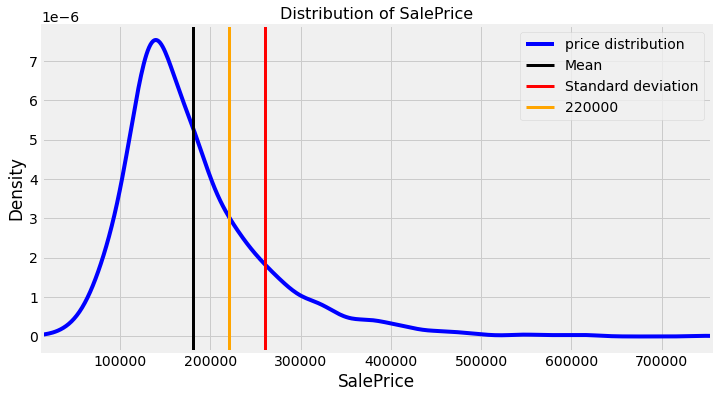

In [5]:
fig = plt.figure(figsize=(12, 6))
from numpy import arange
plt.style.use('fivethirtyeight')
houses['SalePrice'].plot.kde(label = 'price distribution', legend = True, color = 'blue', xticks = arange(0, houses.SalePrice.max(), 100000)  )

# lines indicating mean, and standard deviation
plt.axvline(x = houses['SalePrice'].mean(), ymin = 0, ymax = 1, label = 'Mean', linewidth = 3, color = 'black')
plt.axvline(x = houses['SalePrice'].mean() + houses.SalePrice.std(ddof=0), ymin = 0, ymax = 1, label = 'Standard deviation', linewidth = 3, color = 'red')
plt.axvline(x = 220000, ymin = 0, ymax = 1, label = '220000', linewidth = 3, color = 'orange')
plt.xlim(houses.SalePrice.min(),houses.SalePrice.max())
plt.legend()
plt.xlabel('SalePrice')
plt.title("Distribution of SalePrice", fontsize = 16)
plt.show()

very_expensive = False

### Number of Standard Deviations

For each distribution below, the distance between 220,000 and the mean 180,000 is 40,000. For the distribution on the left, this distance of 40,000 is exactly equal to its standard deviation. With this in mind, we could say that 220,000 is one standard deviation away from the mean — this is the same as saying 220,000 is 40,000 away from the mean (because "one standard deviation" is equivalent to 40,000).



For the distribution on the right, the standard deviation is 10,000. The distance between 220,000 and 180,000 is still 40,000, but in this case 40,000 is four times greater than the standard deviation of 10,000. We could thus say that 220,000 is four standard deviations away from the mean — this is the same as saying that 220,000 is 40,000 away from the mean (because "four standard deviations" is equivalent to 40,000, since one standard deviation is 10,000, and 4 × 10,000 = 40,000)
).

We can measure how far off a value is from the mean in terms of number of standard deviations. If a price of 220,000 is one standard deviation away from the mean, then we can conclude that this value is relatively close to the mean, and it's not very expensive compared to the other prices in the distribution.

If a price of 220,000 is four standard deviations away from the mean, then we know that this value is very far away from the mean. This means that 220,000 is very uncommon and very expensive compared to the other prices in the distribution.

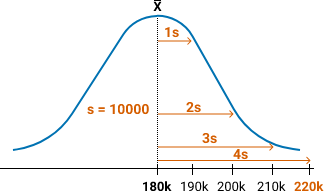

**Exercise**

Find out the number of standard deviations away from the mean for a price of 220,000 in the distribution of the `SalePrice` variable.
- Measure the distance between 220,000 and the mean of the `SalePrice` column.
- Divide the distance by the standard deviation of the `SalePrice` column (assume the data we have is a population) to find the number of standard deviations away from the mean.
- Assign result to a variable named `st_devs_away`.

In [6]:
mean = houses.SalePrice.mean()
stdev = houses.SalePrice.std(ddof = 0)
st_devs_away = (220000 - mean) / stdev
st_devs_away

0.4908280788718362

### Z-score
What we have calculated above is known as z-score. for any value x in a population with mean μ and standard deviation σ, the number of standard deviations away from the mean is given by the formula below, where we denote the number of standard deviations away from the mean with z:

$$\begin{equation}
z = \frac{x - \mu}{\sigma}
\end{equation}$$

The value representing the number of standard deviations away from the mean is commonly known as the **standard score**, or the **z-score**.

For the samples, Z-scores can be defined as: 
$$\begin{equation}
z = \frac{x - \bar{x}}{s}
\end{equation}$$

where standard deviation is calculated with Bessel's correction. 

If the sample mean is 180,000 and standard deviation is 40,000; then a price of 100,000 will have a z-score of -2:

$$\begin{equation}
z = \frac{100000 - 180000}{40000} = \frac{-80000}{40000} = -2
\end{equation}$$

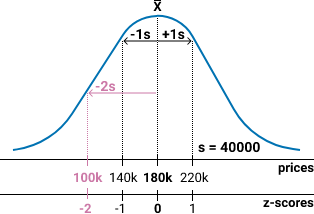

We can see that a z-score has two parts:

- The sign, which indicates whether the value is above or below the mean.
- The value, which indicates the number of standard deviations that a value is away from the mean.

Generally, the sign of a z-score is written out even if the z-score is positive. If a value is two standard deviations away from the mean, we should write that the z-score is +2, not 2.



**Exercise**

Write a function that takes in a value, the array the value belongs to, and returns the z-score of that value. Inside the function's definition:

- Compute the mean of the array.
- Compute the standard deviation of the array. The function should be flexible enough to compute z-scores for both samples and populations. We can use the `std()` function from numpy.

- Find out the distance between the value and the mean of the array.
- Compute the z-score by dividing the distance by the standard deviation of the array.
- Return the z-score.
- Compute the z-score for`min_val`, `mean_val`, `max_val`. Assume that the values come from a population.

Assign the z-score for min_val to a variable named `min_z`.
Assign the z-score for mean_val to a variable named `mean_z`.
Assign the z-score for max_val to a variable named `max_z`.

In [7]:
def get_zscore(value, array, ddof = 0):
    from numpy import std
    mean = sum(array)/len(array)
    stdev = std(array, ddof = ddof)
    zscore = (value - mean) / stdev
    return zscore

In [8]:
sale_price = houses['SalePrice']
min_val = houses['SalePrice'].min()
mean_val = houses['SalePrice'].mean()
max_val = houses['SalePrice'].max()

min_z = get_zscore(min_val, sale_price, ddof = 0)
mean_z = get_zscore(mean_val, sale_price, ddof = 0)
max_z = get_zscore(max_val, sale_price, ddof = 0)

print(min_z, mean_z, max_z)

-2.1034258973406126 0.0 7.188956446929806


### Locating Values in Different Distributions

Assume we're working as data analysts for a real estate company, and we want to find the best neighborhood in Ames to invest in (our data set describes sale prices for houses in Ames, Iowa). Our company wants to buy a couple of houses that we can then rent and ideally sell back later at a higher price. We think that location is an important factor driving rental and sale prices, and we want to target our investment based on location.

The company budgeted 10,000,000 for this investment, and the plan is to buy 50 houses of 200,000 each. Depending on the market particularities of each neighborhood, a 200,000 house can be considered cheap, average-priced, or expensive. We want to find a neighborhood where a price of 200,000 goes as average because average-priced houses are the ones that are most rented and easiest to sell.

Sale prices are lower in a bad neighborhood, and someone can get a high-quality house for 200,000, but usually people avoid bad neighborhood nonetheless for a variety of reasons: distance from the workplace, lack of schools, pollution, noise, etc.

High-quality neighborhoods will tend to be avoided as well because of the higher sale prices — with 200,000, we may only be able to get a poor-quality house in a good location. So most people will aim for something in the middle — these people make up the market we intend to reach.

We're asked by our real estate specialists to analyze historical data on five neighborhoods:

- North Ames.
- College Creek.
- Old Town.
- Edwards.
- Somerset.

Our goal is to find out for which of these neighborhoods a 200,000 house is average-priced. We can solve this task quickly by measuring the z-score for a 200,000 value for each of the five distributions — each of the five neighborhoods has its own distribution of sale prices with its own mean and standard deviation.

We saw above that the mean of a distribution has a z-score of 0, so our recommendation should be the neighborhood with the z-score closest to 0. 

Note that we can't simply find the mean sale price of each neighborhood and then just subtract 200,000 from the mean to find the neighborhood with the lowest difference. This way we'd fail to take into account the variability of each distribution.

**Exercise**

Find out the location for which 200,000 has the z-score closest to 0.

- Isolate the data for each of the five neighborhoods. The neigborhoods are described in the `Neighborhood` column. These are the abbreviations for our neighborhoods of interest:
`'NAmes'` for North Ames.
`'CollgCr'` for College Creek.
`'OldTown'` for Old Town.
`'Edwards'` for Edwards.
`'Somerst'` for Somerset.

- We can use Dataframe.groupby() function to isolate the data or use a boolean like: `houses[houses['Neighborhood'] == 'NAmes']` and save the data to a variable.

- Find the z-score of a 200,000 price for each of the five isolated data sets. Assume that each data set is a population.
- Examine the z-scores to find the best location to invest in.

In [9]:
neighborhoods = ['NAmes', "CollgCr", 'OldTown', 'Edwards', 'Somerst']
z_scores = {}

for location in neighborhoods:
    z = get_zscore(200000, (houses.groupby('Neighborhood')['SalePrice'].get_group(location)), ddof = 0)
    z_scores[location] = abs(z) # We are only interested in distance away fro mmean, not the + or - sign
lowest_zscore = min(z_scores, key = z_scores.get)    
print(z_scores) 
print(lowest_zscore)

{'NAmes': 1.7239665910370237, 'CollgCr': 0.03334366282705464, 'OldTown': 1.7183080926865524, 'Edwards': 1.443576193848941, 'Somerst': 0.5186390646965722}
CollgCr


### Transforming Distributions

Z-scores are often used to transform entire distributions by converting all the values to z-scores. Consider, for instance, the distribution of the SalePrice column.

We can transform the entire distribution by converting each value to a z-score.

Below we:
- Convert each value to a z-score by using the `Series.apply()` method.
- Store the z-scores in a separate column named `z_prices`.
- Plot side by side the kernel density plot for the original values and the kernel density plot for the z-scores.

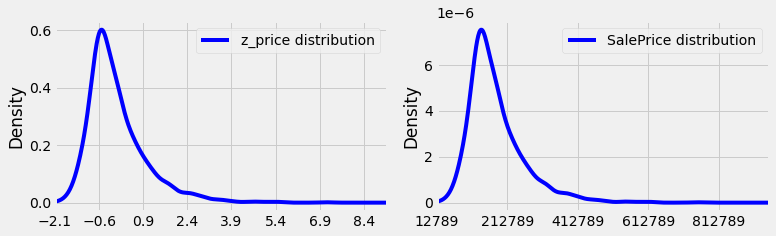

In [10]:
mean = houses['SalePrice'].mean()
st_dev = houses['SalePrice'].std(ddof = 0)

houses['z_prices'] = houses['SalePrice'].apply(
    lambda x: ((x - mean) / st_dev)
    )


fig = plt.figure(figsize=(11, 3.5))
from numpy import arange
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
houses['z_prices'].plot.kde(label = 'z_price distribution', 
                            legend = True, color = 'blue', xticks = arange(houses.z_prices.min(), houses.z_prices.max()+2, 1.5), 
                            xlim = (houses.z_prices.min(), houses.z_prices.max() + 2)
                           )


plt.subplot(1, 2, 2)
houses['SalePrice'].plot.kde(label = 'SalePrice distribution', legend = True, 
                             color = 'blue', xticks = arange(houses.SalePrice.min(), houses.SalePrice.max() + 400000, 200000),
                             xlim = (houses.SalePrice.min(), houses.SalePrice.max() + 200000)
                            )
plt.tight_layout() # otherwise the plots will overlay partially
plt.show()




Notice above that the shape of the initial distribution is preserved perfectly in the new distribution of z-scores. 


**Exercise**

Above, we've already transformed the distribution of the SalePrice variable to distribution of z-scores and saved the new values to a column named `z_prices`.

- Compute the mean of the `z_prices` column and assign the result to a variable named `z_mean_price`.
- Compute the standard deviation of the `z_prices` column and assign the result to a variable named `z_stdev_price`. Assume  the standard deviation for a population.


Transform the distribution of the `Lot Area` variable into a distribution of z-scores.

- Compute the mean of the new distribution of z-scores and assign the result to a variable named `z_mean_area`.
- Compute the standard deviation of the new distribution of z-scores and assign the result to a variable named `z_stdev_area`. Assume that you're computing the standard deviation for a population.

Compare the values of `z_mean_price` and `z_mean_area`. Record observtions. How can this be explained?

Compare the values of `z_stdev_price` and `z_stdev_area`. What do you observe? How can you explain that?

In [11]:
z_mean_price = round(houses['z_prices'].mean(), 10)
z_stdev_price = round(houses['z_prices'].std(ddof = 0), 10)

# Transforming Lot Area
mean_lot_area = houses['Lot Area'].mean()
stdev_lot_area = houses['Lot Area'].std(ddof = 0)
houses['z_area'] = houses['Lot Area'].apply(
    lambda x: ((x - mean_lot_area) / stdev_lot_area)
    )

z_mean_area = round(houses.z_area.mean(), 10)
z_stdev_area = round(houses.z_area.std(ddof = 0), 10)

print(z_mean_price, z_mean_area)
print(z_stdev_price, z_stdev_area)

-0.0 0.0
1.0 1.0


### The Standard Distribution

Above we have rounded off the z_scores to 10 decimal places to show how close they are to zero (actually these are not zero but very close to zero such as 0.000000000000014299009).

In fact, for every distribution of z-scores, the mean is always 0 and the standard deviation is always 1.

Consider the transformation of a normally-distributed population of sale prices with mean μ=180000 and standard deviation σ=
10000:

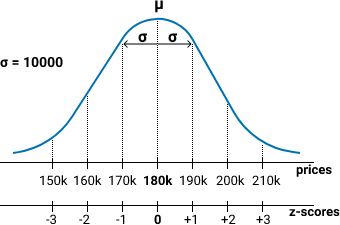

Notice that when we transform to z-scores, the initial values are practically relabeled and the relative location of each value in the distribution is perfectly preserved. This explains why the shape of the original distribution is preserved, and it also means that the location of the mean and the standard deviation is preserved as well.

The mean is located at 180000 in the initial distribution. In the z-score distribution, the mean has the same location, but now there's a value of 0 at that location because the z-score of 180000 is 0.

Notice that the value of the standard deviation (10000) is given by the difference between the value that is one standard deviation above the mean (190000) and the mean (180000): 
190000 − 180000 = 10000
After converting 190000 and 180000 to z-scores, the difference becomes 
1 − 0 = 1
, so the standard deviation of the z-score distribution is 1.

$$\begin{equation}
\mu_z = \frac{\mu - \mu}{\sigma} = \frac{0}{\sigma} = 0
\end{equation}$$

$$\begin{equation}
\sigma_z = \frac{(\mu + \sigma) - \mu}{\sigma} =
\frac{\sigma}{\sigma} = 1
\end{equation}$$

A distribution of z-scores is often called a **standard distribution** (z-scores are also called **standard scores**). When we convert a distribution to z-scores, we'd say in statistical terns that we **standardized the distribution**.

**Exercise**

Standardize the population of values stored in the population variable and compute its mean μz and its standard deviation σz.
- Assign the value of μz to a variable named `mean_z`.
- Assign the value of σz to a variable named `stdev_z`.
- We should get μz = 0  and σz = 1 because there'll be no rounding errors.

In [12]:
from numpy import std, mean
population = [0,8,0,8]

mean_pop = mean(population)
stdev_pop = std(population, ddof = 0)

std_population = []
for value in population:
    z_value = (value - mean_pop) / stdev_pop
    std_population.append(z_value)
    
mean_z = mean(std_population)
stdev_z = std(std_population, ddof = 0)

print(mean_z, stdev_z)


0.0 1.0


### Standardizing Samples

If we treat the `population` variable above, as a sample and proceed to standardize it we'll use the formula for the sample standard deviation s  (the formula containing Bessel's correction):

In [13]:
from numpy import std, mean

sample = [0,8,0,8]
x_bar = mean(sample)
s = std(sample, ddof = 1)

standardized_sample = []
for value in sample:
    z = (value - x_bar) / s
    standardized_sample.append(z)

print(standardized_sample)

print(mean(standardized_sample))

print(std(standardized_sample)) # ddof = 0 by default

[-0.8660254037844387, 0.8660254037844387, -0.8660254037844387, 0.8660254037844387]
0.0
0.8660254037844387


Above, we measured the standard deviation using the formula for the population standard deviation σ (the formula without Bessel's correction). When we standardize a sample, the resulting distribution of z-scores is also a sample. This means that we need to use the formula for the sample standard deviation s, when we compute the standard deviation.

Below, we compute the standard deviation of `standardized_sample` using the sample standard deviation formula, and assign the result to a variable named `stdev_sample`.
We can see below, that the value for `stdev_sample` comes out to be 1.

In [14]:
stdev_sample = std(standardized_sample, ddof = 1)
print(stdev_sample)

1.0


### Using Standardization for Comparisons

Standardizing distributions can prove very useful when we need to compare values coming from different systems of measurement. Let's say there are two companies in Ames which offer services in evaluating overall house quality. Inspectors from each company examine houses and rate them with an index score which describes the overall quality of the house.

The inspection itself is quite expensive, and a house owner generally asks the service from only one company. The problem is that each company has its own system of measuring overall quality, which results in index scores that are impossible to compare. Example can be seen below:

    index_1	index_2	SalePrice
    0	NaN	-0.411111	215000

    1	38.05	NaN	105000

    2	NaN	-0.888889	172000

    3	39.44	NaN	244000

    4	NaN	-0.690000	189900


Let's suppose that these houses are not yet sold, and a client needs our help to choose between the first and the second house (from the table above). We want to begin with comparing index scores, but the first house has an index of -0.41111, the second's index is 38.05000, and the two indices come from different measurement systems, which makes them impossible to compare.

One thing the two systems have in common is that the index is directly proportional with the house quality — a lower index means lower quality, and a higher index means higher quality. To compare these indices coming from different measurement systems, we can:

- Standardize each distribution of index values (transform each index to a z-score).
- Then compare the z-scores.

Average houses will have z-scores around 0 in both distributions, good-quality houses will have z-scores significantly greater than 0, and low-quality houses will have z-scores significantly lower than 0.

For the sake of the example, we're also under the strong assumption that both companies evaluate houses of all levels of quality. If a company evaluates only low-quality houses, then the best of the low quality houses will have a z-score significantly greater than 0, suggesting erroneously that they are high-quality.

```
mean_index1 = houses['index_1'].mean()
stdev_index1 = houses['index_1'].std(ddof = 0)
houses['z_1'] = houses['index_1'].apply(lambda x: 
                                      (x - mean_index1) / stdev_index1
                                     )

mean_index2 = houses['index_2'].mean()
stdev_index2 = houses['index_2'].std(ddof = 0)
houses['z_2'] = houses['index_2'].apply(lambda x: 
                                      (x - mean_index2) / stdev_index2
                                     )

print(houses[['z_1', 'z_2']].head(2))
better = 'first'


z_1       z_2
0      NaN  0.429742
1 -0.93592       NaN
```

### Converting back from z-scores
Above, we standardized the index_1 and index_2 distributions and managed to solve our comparison task. Z-scores may not be always straightforward to work with or communicate to non-technical audiences, but fortunately we can convert them to other values that are more intuitive.

The formula for finding a z-score in a population is:
$$\begin{equation}
z = \frac{x - \mu}{\sigma}
\end{equation}$$

From above, it can be shown that:

$$x = z\sigma + \mu$$

With above formula we can convert z-scores to more intuitive values. We already have the values for z , but what about μ
and σ? We are actually free to choose any values we want for μ and σ. We want some more intuitive values for our two standardized distributions of index values, so let's choose μ=50 and σ=10.

The first house has a z score of 0.428742:

$$\begin{equation}
0.429742 \cdot 10 + 50 = 54.29742
\end{equation}$$

Each z-score in the distribution will follow the same procedure — it'll be multiplied by 10 and then we'll add 50 to the result of the product. This means that the location of each z-score will be preserved perfectly — it's all a matter of relabeling. To make this transformation, notice that we took several steps:

- We standardized an initial distribution with a given μ and σ
(we performed this step above when we standardized the distribution of index_1 and index_2).
- converted the standardized distribution to values that together have a different mean μ and standard deviation σ than they did initially.

For any standardized distribution we can also convert the z-scores back to the original values. All we have to do is use the initial values for μ and σ  in the x=zσ+μ formula. However, it's more common in practice to transform the standardized distribution with convenient values for μ and σ. One practical example include [transforming test scores for the SAT test](https://en.wikipedia.org/wiki/SAT#SAT-ACT_score_comparisons) using μ=500 and σ=110 or [transforming IQ scores from different measurement systems](https://www.edubloxtutor.com/iq-test-scores/) using μ=100 and σ=15. 

Notice that above we discussed only about populations, but the same reasoning applies to samples.

**Exercise**
The two columns of z-scores are merged together into a new column named `z_merged`.

- Transform the standardized distribution of z_merged to a distribution with a μ=50 and σ=10 using the formula x=zσ+μ.
- Compute the mean of the newly transformed distribution — the mean should be 50, but expect some minor rounding errors.
- Assign the result to a variable named `mean_transformed`.
- Compute the standard deviation of the newly transformed distribution — the standard deviation should be 10, but expect some minor rounding errors. Assign the result to a variable named `stdev_transformed`.

```
houses['z_merged_transformed'] = houses.z_merged.apply(lambda x: x*10+50)

mean_transformed = houses.z_merged_transformed.mean()
stdev_transformed = houses.z_merged_transformed.std(ddof=0)

print(mean_transformed, stdev_transformed)

50.00000000000001 10.0
```